In [1]:
# MIT License

# Copyright (c) 2017 Johannes Dollinger

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# https://github.com/emulbreh/bridson

from random import random
from math import cos, sin, floor, sqrt, pi, ceil

def euclidean_distance(a, b):
    dx = a[0] - b[0]
    dy = a[1] - b[1]
    return sqrt(dx * dx + dy * dy)

def poisson_disc_samples(width, height, r, k=5, distance=euclidean_distance, random=random):
    tau = 2 * pi
    cellsize = r / sqrt(2)

    grid_width = int(ceil(width / cellsize))
    grid_height = int(ceil(height / cellsize))
    grid = [None] * (grid_width * grid_height)

    def grid_coords(p):
        return int(floor(p[0] / cellsize)), int(floor(p[1] / cellsize))

    def fits(p, gx, gy):
        yrange = list(range(max(gy - 2, 0), min(gy + 3, grid_height)))
        for x in range(max(gx - 2, 0), min(gx + 3, grid_width)):
            for y in yrange:
                g = grid[x + y * grid_width]
                if g is None:
                    continue
                if distance(p, g) <= r:
                    return False
        return True

    p = width * random(), height * random()
    queue = [p]
    grid_x, grid_y = grid_coords(p)
    grid[grid_x + grid_y * grid_width] = p

    while queue:
        qi = int(random() * len(queue))
        qx, qy = queue[qi]
        queue[qi] = queue[-1]
        queue.pop()
        for _ in range(k):
            alpha = tau * random()
            d = r * sqrt(3 * random() + 1)
            px = qx + d * cos(alpha)
            py = qy + d * sin(alpha)
            if not (0 <= px < width and 0 <= py < height):
                continue
            p = (px, py)
            grid_x, grid_y = grid_coords(p)
            if not fits(p, grid_x, grid_y):
                continue
            queue.append(p)
            grid[grid_x + grid_y * grid_width] = p
    return [p for p in grid if p is not None]

poisson_disc_samples(10, 10, 2, k=5)

[(2.1906818868613134, 0.03778107280125198),
 (5.212343059483444, 0.6188380301410525),
 (7.855967550475475, 1.2949343820303552),
 (9.852576222069183, 0.44386686127727026),
 (2.545681445804261, 2.1010966124539716),
 (9.776272949390727, 2.5572522857709905),
 (1.273998773037441, 4.85065056219251),
 (4.409529806382468, 4.72453780169026),
 (6.479299140886299, 4.348630859121757),
 (4.377481524839432, 6.783860748596777),
 (6.667773301779281, 6.950580549223883),
 (9.300993270067043, 6.397601816316865),
 (1.1220977310640077, 7.166239862210034),
 (2.4500441128442056, 9.38365107700543),
 (5.784000463805129, 9.209850671970411),
 (8.42745643979567, 9.253190070815071)]

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 24})
plt.rcParams.update({'font.weight': 'bold'})

50 nodes. 4 LPN per FN. FN/RN count = 12.5


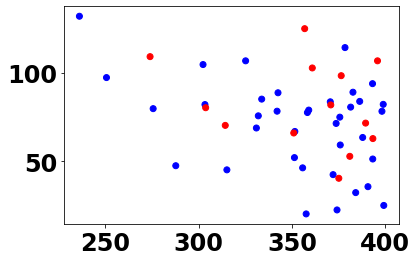

50 nodes. 4 LPN per FN. FN/RN count = 12.5


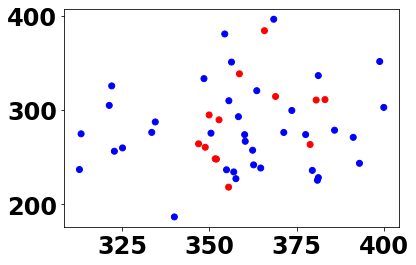

50 nodes. 4 LPN per FN. FN/RN count = 12.5


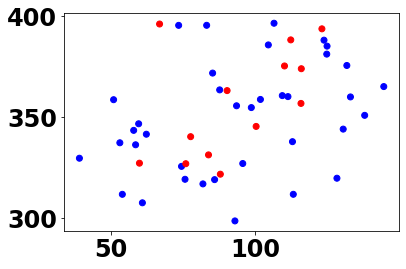

50 nodes. 4 LPN per FN. FN/RN count = 12.5


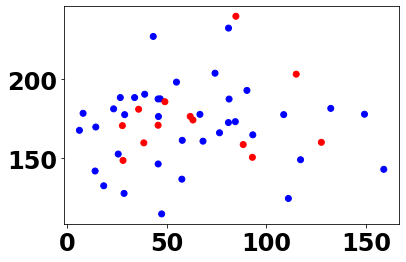

50 nodes. 4 LPN per FN. FN/RN count = 12.5


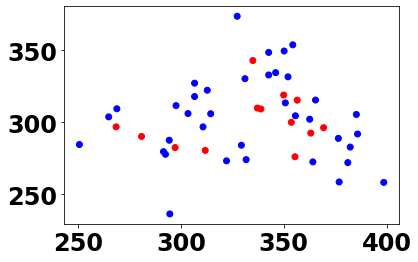

50 nodes. 4 LPN per FN. FN/RN count = 12.5


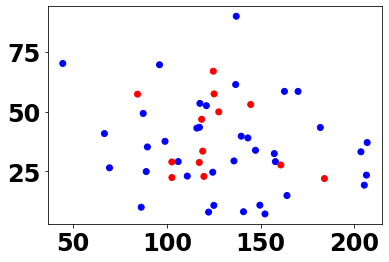

50 nodes. 4 LPN per FN. FN/RN count = 12.5


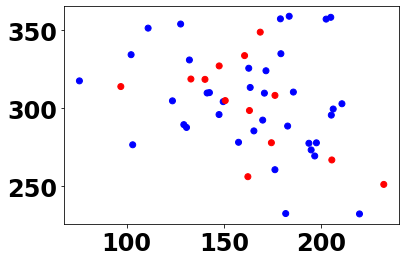

50 nodes. 4 LPN per FN. FN/RN count = 12.5


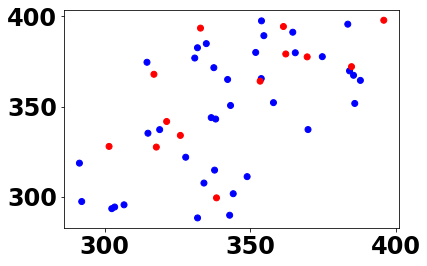

50 nodes. 4 LPN per FN. FN/RN count = 12.5


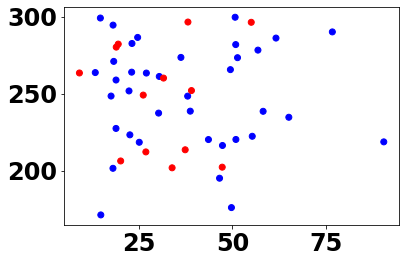

50 nodes. 4 LPN per FN. FN/RN count = 12.5


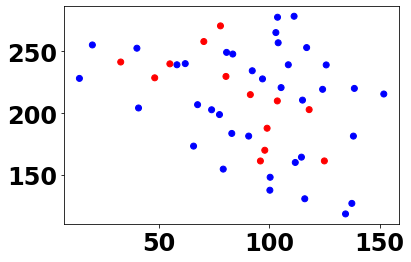

In [38]:
import random
from math import cos, sin, floor, sqrt, pi, ceil

mapWidthM = 400
mapHeightM = 400

nodeCount = 50
lpnFnRatio = 4
minDistanceM = 12
maxDistanceM = 48

def getRandomPoint(mapWidthM, mapHeightM, startX, startY, minDistance, maxDistance):
    x = -1
    y = -1
    
    while x < 0 or y < 0 or x > mapWidthM or y > mapHeightM:
        targetDistance = random.uniform(minDistanceM,maxDistanceM)
        theta = random.random()*pi*2
        
        x = startX + cos(theta)*targetDistance;
        y = startY + sin(theta)*targetDistance;
    return [x,y]

def genMap(mapWidthM, mapHeightM, nodeCount, lpnFnRatio, minDistanceM, maxDistanceM):
    
    nRelayNodes = nodeCount/lpnFnRatio

    if nRelayNodes <= 0:
        print('Invalid nodeCount/lpnFnRatio proportion')
        exit

    print(str(nodeCount) + ' nodes. ' + str(lpnFnRatio) + ' LPN per FN. FN/RN count = ' + str(nRelayNodes))

    startX = random.randint(0, mapWidthM)
    startY = random.randint(0, mapHeightM)

    nodeMap = [{
        'x': startX,
        'y': startY,
        'mode': 'relay'
    }]

    for i in range(1, nodeCount):
        lpn = i >= nRelayNodes

        mode = None

        if not lpn:
            mode = 'relay'
            # Relay node. Should spawn near the last appended relay node
            randomPoint = getRandomPoint(mapWidthM, mapHeightM, startX, startY, minDistanceM, maxDistanceM)
            x = randomPoint[0]
            y = randomPoint[1]
            startX = x
            startY = y
        else:
            mode = 'lpn'
            relayIdx = int((i - nRelayNodes) % nRelayNodes)

            relay = nodeMap[relayIdx]
            if relay['mode'] != 'relay':
                print('Error. LPN chose a non-relay node to spawn near-to')
                exit

            # Low power node. Should spawn near a relay node.
            randomPoint = getRandomPoint(mapWidthM, mapHeightM, relay['x'], relay['y'], minDistanceM, maxDistanceM)
            x = randomPoint[0]
            y = randomPoint[1]
        nodeMap.append({
            'x': x,
            'y': y,
            'mode': mode
        })
    return nodeMap

def saveNedFile(fileName, networkName, nodeMap, mapHeightM):
    template = open("nedGenTemplate.txt", "r")
    templateTxt = template.read()
    templateTxt = templateTxt.replace('##{NETWORK_NAME}##', networkName)
    
    df = pd.DataFrame(data=reversed(nodeMap))
    maximum_x_value = df['x'].max()
    minimum_x_value = df['x'].min()
    maximum_y_value = df['y'].max()
    minimum_y_value = df['y'].min()
    
    scale = 2
    
    nodesStr = ''
    i = 1
    for node in nodeMap:
        mode = 'lpn'
        
        if(node['mode'] == 'relay'):
            mode = 'fn_rly'
        nodeText = '\n    host_' + mode + '_' + str(i) + ': <default("SensorNode")> like INetworkNode {'
        nodeText = nodeText + '\n        @display("p=' + "{:.2f}".format((node['x'])*scale) + ',' + "{:.2f}".format((mapHeightM - node['y'])*scale) + '");'
        nodeText = nodeText + '\n    }\n'
        nodesStr = nodesStr + nodeText
        i = i + 1
    
    templateTxt = templateTxt.replace('##{NODES}##', nodesStr)
    
    f = open(fileName, "w")
    f.write(templateTxt)
    f.close()

for i in range (0, 10):
    nodeMap = genMap(mapWidthM, mapHeightM, nodeCount, lpnFnRatio, minDistanceM, maxDistanceM)
    saveNedFile('myFile.txt', 'MAM200', nodeMap, mapHeightM)
    df = pd.DataFrame(data=reversed(nodeMap))
    colors = {'relay':'red', 'lpn':'blue'}

    plt.scatter(df['x'], df['y'], c=df['mode'].map(colors))
    plt.show()